In [20]:
from math import ceil

import pandas as pd
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.family'] = 'Times New Roman'

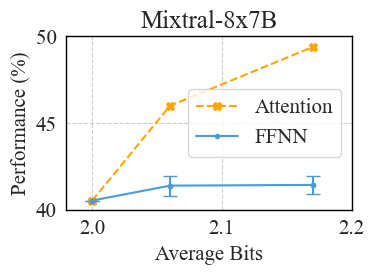

In [21]:
data = {
    'bits': [2, 2.06, 2.17],
    'mean': [40.53, 41.39, 41.43],
    'std': [0.00, 0.57, 0.52],
    'attn': [40.53, 46.00, 49.39]
}

# Creating a DataFrame
df = pd.DataFrame(data)
# Plotting
sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(df['bits'], df['attn'], label='Attention', color='#FFA500', linestyle='--', marker='X')
plt.plot(df['bits'], df['mean'], label='FFNN', color='#4B9CD3', linestyle='-', marker='.')
# Add error bars
plt.errorbar(df['bits'], df['mean'], yerr=df['std'], fmt='.', color='#4B9CD3', capsize=5)

# ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adding titles and labels
plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend()

ax.set_xticks([2, 2.1, 2.2])
ax.set_yticks([40.00, 45.00, 50.00])
ax.set_xlim([1.98, 2.2])


def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)


_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig('ffnn_vs_attn_mixtral.svg', dpi=300)

In [ ]:
data = {
    'bits': [2, 2.06, 2.17],
    'mean': [49.44, 41.39, 41.43],
    'std': [0.00, 0.57, 0.52],
    'attn': [49.44, 57.48, 49.39]
}

# Creating a DataFrame
df = pd.DataFrame(data)
# Plotting
sns.set_style("whitegrid")
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4.5, 3))

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

# Plot line for mean values
plt.plot(df['bits'], df['attn'], label='Attention', color='#FFA500', linestyle='--', marker='X')
plt.plot(df['bits'], df['mean'], label='FFNN', color='#4B9CD3', linestyle='-', marker='.')
# Add error bars
plt.errorbar(df['bits'], df['mean'], yerr=df['std'], fmt='.', color='#4B9CD3', capsize=5)

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adding titles and labels
plt.title('Mixtral-8x7B')
plt.xlabel('Average Bits')
plt.ylabel('Performance (%)')
plt.legend(loc="right")

ax.set_xticks([2, 2.1, 2.2])
ax.set_yticks([40.00, 45.00, 50.00])
ax.set_xlim([1.98, 2.2])


def _set_boarder(spine):
    spine.set_color('black')
    spine.set_linewidth(1.)


_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

# Show plot
plt.tight_layout()
plt.savefig('ffnn_vs_attn_deepseek.svg', dpi=300)

In [55]:
# Create a color map
cmap = LinearSegmentedColormap.from_list("custom_blue", ["white", "#4B9CD3", "#151515"])
# cmap = LinearSegmentedColormap.from_list("custom_blue", ["#e7f5ff", "#d0ebff", "#a5d8ff", "#74c0fc", "#4dabf7", "#339af0", "#228be6", "#1c7ed6", "#1971c2", "#1864ab"])

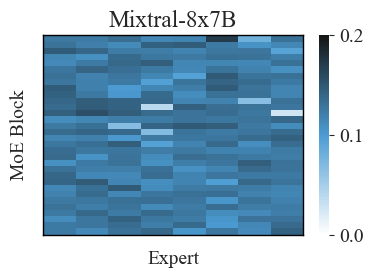

In [66]:
mixtral_rount = torch.load("/Users/lipingzhi/Downloads/routing-count.pt")
mixtral_frequency = mixtral_rount / torch.sum(mixtral_rount, dim=-1, keepdim=True)
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(4, 3))
v_max = torch.max(mixtral_frequency)
v_max = ceil(v_max * 10) / 10
v_min = 0.0
ax = sns.heatmap(
    mixtral_frequency,
    cmap=cmap,
    # cmap=sns.color_palette("rocket_r", as_cmap=True),
    linewidth=0, vmax=v_max, vmin=v_min
)
# set the colorbar labels to only one decimal place
num_ticks = v_max * 10 + 1
ax.collections[0].colorbar.set_ticks([v_min + 0.1 * i for i in range(int(num_ticks))])
ax.collections[0].colorbar.set_ticklabels([f"{v_min + 0.1 * i:.1f}" for i in range(int(num_ticks))])
ax.set_title(f"Mixtral-8x7B")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Expert")
ax.set_ylabel("MoE Block")

def _set_boarder(spine):
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('mixtral_routing.svg', dpi=300)

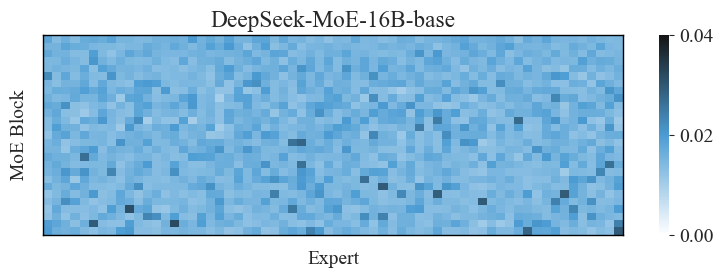

In [68]:
count = torch.load("/Users/lipingzhi/Downloads/deepseek-routing-count.pt")
frequency = count / torch.sum(count, dim=-1, keepdim=True)
sns.set_palette("colorblind")
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(8, 3))
v_max = torch.max(frequency)
v_max = ceil(v_max * 50) / 50
v_min = 0.0
ax = sns.heatmap(
    frequency,
    cmap=cmap,
    # cmap=sns.color_palette("rocket_r", as_cmap=True),
    linewidth=0, vmax=v_max, vmin=v_min
)
# set the colorbar labels to only one decimal place
num_ticks = v_max * 50 + 1
ax.collections[0].colorbar.set_ticks([v_min + 0.02 * i for i in range(int(num_ticks))])
ax.collections[0].colorbar.set_ticklabels([f"{v_min + 0.02 * i:.2f}" for i in range(int(num_ticks))])
ax.set_title(f"DeepSeek-MoE-16B-base")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Expert")
ax.set_ylabel("MoE Block")

def _set_boarder(spine):
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.)

_set_boarder(ax.spines['left'])
_set_boarder(ax.spines['bottom'])
_set_boarder(ax.spines['right'])
_set_boarder(ax.spines['top'])

plt.tight_layout()
plt.savefig('deepseek_routing.svg', dpi=300)

/var/folders/qt/t2jj1p_93v101wjd3zc55k_00000gn/T/ipykernel_62694/4182111603.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range(len(layer_score)), y=layer_score, palette="rocket", legend=False)


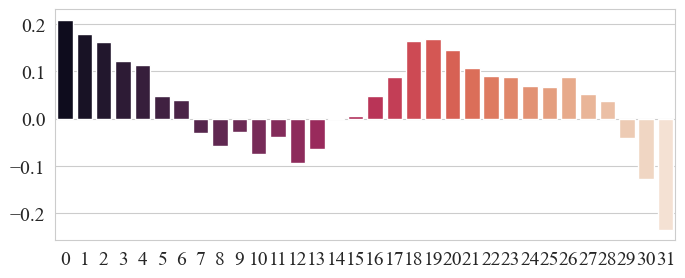

In [73]:
layer_score = [0.208984375, 0.1796875, 0.1611328125, 0.12109375, 0.1123046875, 0.04833984375, 0.03955078125,
               -0.0311279296875, -0.058349609375, -0.02880859375, -0.07568359375, -0.03857421875, -0.0947265625,
               -0.06396484375, 0.00089263916015625, 0.00531005859375, 0.046875, 0.0869140625, 0.1630859375, 0.16796875,
               0.1455078125, 0.10693359375, 0.09033203125, 0.0888671875, 0.06982421875, 0.06591796875, 0.0869140625,
               0.052490234375, 0.037841796875, -0.0419921875, -0.12890625, -0.2353515625]
# layer_score = torch.tensor(layer_score)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=range(len(layer_score)), y=layer_score, palette="rocket", legend=False)